In [6]:
# first one

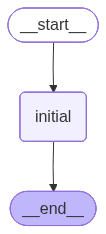

In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """"simple node that adds greeting message to the state. """
    state["message"] = f"Hello, {state['message']}, Welcome to langgraph."
    return state

graph = StateGraph(AgentState)
graph.add_node("initial", greeting_node)

graph.add_edge(START, "initial")
graph.add_edge("initial", END)

bot = graph.compile()

bot


In [8]:
response = bot.invoke({"message": "Asen"})
print(response)

{'message': 'Hello, Asen, Welcome to langgraph.'}


In [9]:
# second one

In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    result: str

In [11]:
def first_node(state: AgentState) -> AgentState:
    """ this is the first node """
    state['result'] = f"{state['name']}, welcome to the system."
    return state


def second_node(state: AgentState) -> AgentState:
    """ this is the second state """
    skills = ", ".join(state['skills'])
    state['result'] = f"{state['result']}', you have skills in {skills}"
    return state


def third_node(state: AgentState) -> AgentState:
    """ this is the third state """
    state['result'] = f"{state['result']}, you are {state['age']} years old."
    return state


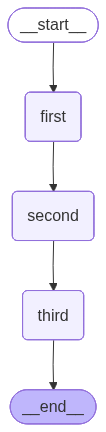

In [12]:
graph = StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.add_edge(START, "first")
graph.add_edge("first", "second")
graph.add_edge("second", "third")
graph.add_edge("third", END)

bot = graph.compile()

bot

In [13]:
payload = {
    "name": "Asen",
    "age": "25",
    "skills": ["AI", "ML", "DL"]
}

response = bot.invoke(payload)
response["result"]

"Asen, welcome to the system.', you have skills in AI, ML, DL, you are 25 years old."

In [14]:
# 3rd - conditional

In [15]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    result: int

In [16]:
def adder(state: AgentState) -> AgentState:
    """ this node add 2 numbers """
    state['result'] = state['num1'] + state['num2']
    return state

def subtracter(state: AgentState) -> AgentState:
    """ this node subtract 2 numbers """
    state['result'] = state['num1'] - state['num2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ this will select the  next node of the graph """
    if state['operation'] == "+":
        return "add_op"
    else:
        return "sub_op"


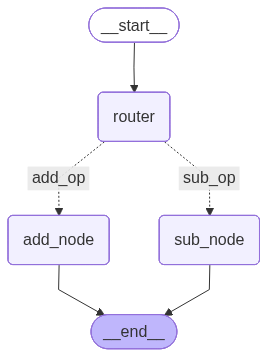

In [17]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("sub_node", subtracter)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        "add_op": "add_node",
        "sub_op": "sub_node"
    }
)


graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

bot = graph.compile()
bot


In [18]:
payload = {
    "num1": 3,
    "num2": 4,
    "operation": "-"
}

response = bot.invoke(payload)
response

{'num1': 3, 'num2': 4, 'operation': '-', 'result': -1}

In [19]:
# Multi-Branch Decision Flows

In [24]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    operation1: str
    operation2: str
    result1: int
    result2: int

In [25]:
def adder1(state: AgentState) -> AgentState:
    """ this node add 2 numbers """
    state['result1'] = state['num1'] + state['num2']
    return state

def subtracter1(state: AgentState) -> AgentState:
    """ this node subtract 2 numbers """
    state['result1'] = state['num1'] - state['num2']
    return state

def adder2(state: AgentState) -> AgentState:
    """ this node add 2 numbers """
    state['result2'] = state['num3'] + state['num4']
    return state

def subtracter2(state: AgentState) -> AgentState:
    """ this node subtract 2 numbers """
    state['result2'] = state['num3'] - state['num4']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """ this will select the  next node of the graph """
    if state['operation1'] == "+":
        return "add_op1"
    elif state['operation1'] == "-":
        return "sub_op1"

def decide_next_node2(state: AgentState) -> AgentState:
    """ this will select the  next node of the graph """
    if state['operation2'] == "+":
        return "add_op2"
    elif state['operation2'] == "-":
        return "sub_op2"



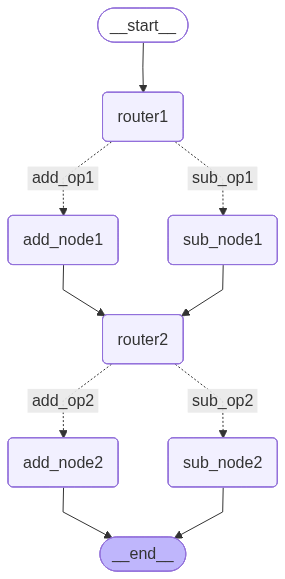

In [30]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("sub_node1", subtracter1)
graph.add_node("router1", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("sub_node2", subtracter2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    'router1',
    decide_next_node1,
    {
        "add_op1": "add_node1",
        "sub_op1": "sub_node1"
    }
)


graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")
graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
        "add_op2": "add_node2",
        "sub_op2": "sub_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

bot1 = graph.compile()
bot1

In [31]:
payload = {
    "num1": 20,
    "num2": 30,
    "num3": 10,
    "num4": 7,
    "operation1": "+",
    "operation2": "-"
}

response = bot1.invoke(payload)
response

{'num1': 20,
 'num2': 30,
 'num3': 10,
 'num4': 7,
 'operation1': '+',
 'operation2': '-',
 'result1': 50,
 'result2': 3}

In [ ]:
#  Loops & Iterative Logic

In [48]:
from typing import TypedDict, List
import random

class AgentState(TypedDict):
    name: str
    numbers: List[int]
    count: int

In [55]:
def greeting(state: AgentState) -> AgentState:
    """ greeing node which say hi to a person """
    state['name'] = f"Hi, {state['name']}. we will start the game."
    return state

def random_state(state: AgentState) -> AgentState:
    """ generate number (random) between 0 and 10 """
    state['numbers'].append(random.randint(0, 10))
    state['count'] += 1
    return state

def should_continue(state: AgentState) -> str:
    """ function to decide what to do next """
    if state['count'] < 5:
        print(f"Enter loop, {state['count']}")
        return "loop"
    else:
        print(f"Exit loop, {state['count']}")
        return "exit"



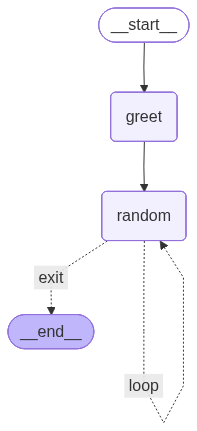

In [56]:
graph = StateGraph(AgentState)

graph.add_node("greet", greeting)
graph.add_node("random", random_state)

graph.add_edge(START, "greet")
graph.add_edge("greet", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

graph.add_edge("random", END)
bot = graph.compile()
bot

In [58]:
payload = {
    "name": "Asen",
    "numbers": [],
    "count": 0
}

response = bot.invoke(payload)
print(response)

Enter loop, 1
Enter loop, 2
Enter loop, 3
Enter loop, 4
Exit loop, 5
{'name': 'Hi, Asen. we will start the game.', 'numbers': [5, 10, 2, 8, 6], 'count': 5}


In [ ]:
# State-Based Conversational 

In [60]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage
from langchain_mistralai import ChatMistralAI
from dotenv import load_dotenv


In [ ]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

load_dotenv()
model = ChatMistralAI(model_name="mistral-small-latest")

In [62]:
def process(state: AgentState) -> AgentState:
    response = model.invoke(state['messages'])
    state['messages'].append(response)
    print(f"AI: {response.content}")
    print("\n")
    return state

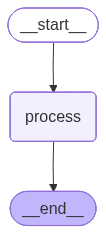

In [63]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

bot = graph.compile()
bot

In [64]:
user_input = input("message: ")
while user_input.lower() != 'exit':
    print(f"Human: {user_input}")
    input_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    bot.invoke(input_state)
    user_input = input("message")

Human: hi
AI: Hello! 😊 How can I help you today?


Human: how are u?
AI: I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with anything you need! 😊 How about you? How are you doing today?


Human: what's d day mean?
AI: **D-Day** refers to the **Normandy Landings** on **June 6, 1944**, during **World War II**, when Allied forces launched a massive invasion of Nazi-occupied France. It was the largest amphibious military operation in history and marked a turning point in the war.

### Key Details:
- **"D-Day"** is a military term meaning the **day on which a combat operation is to be initiated** (the "D" stands for "Day").
- The operation was codenamed **Operation Overlord** and involved **over 156,000 Allied troops** (American, British, Canadian, and others).
- The landings took place on **five beaches in Normandy**: Utah, Omaha, Gold, Juno, and Sword.
- The success of D-Day led to the **liberation of Western Europe** and the eventual defeat of N

In [ ]:
# tools

In [65]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, SystemMessage
from langchain_mistralai import ChatMistralAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode


In [66]:
load_dotenv()
model = ChatMistralAI(model_name="mistral-small-latest")

In [67]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [68]:
@tool
def add(a: int, b: int) -> int:
    """ this will add 2 numbers"""
    return a + b
@tool
def sub(a: int, b: int) -> int:
    """ this will subtract 2 numbers"""
    return a - b
@tool
def mul(a: int, b: int) -> int:
    """ this will multiply 2 numbers"""
    return a * b
@tool
def div(a: int, b: int) -> int:
    """ this will divide 2 numbers"""
    return a / b


In [ ]:
my_tools = [add, sub, mul, div]
model = model.bind_tools(my_tools)

def model_call(state: AgentState) -> AgentState:
    system_prompt=SystemMessage(content="you are an AI assistant, please answer my query to the best of you can")
    inputs=[system_prompt]+state['messages']
    response=model.invoke(inputs)
    return {'messages': state['messages'] + [response]}

def should_continue(state: AgentState):
    messge=state['messages']
    last_message = messge[-1]
    if not last_message.tool_calls:
        return "end"
    else:
        return "continue"


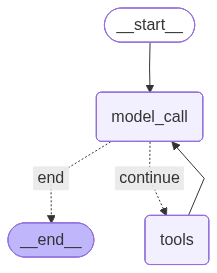

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("model_call", model_call)

tool_node = ToolNode(tools=my_tools)
graph.add_node("tools", tool_node)

graph.add_edge(START, "model_call")
graph.add_conditional_edges(
    "model_call",
    should_continue,
    {
        "end": END,
        "continue": "tools"
    }
)

graph.add_edge("tools", "model_call")
graph.add_edge("model_call", END)


bot = graph.compile()
bot

In [77]:
def print_stream(stream):
    for s in stream:
        message = s['messages'][-1]
        if (isinstance(message, tuple)):
            print(message)
        else:
            message.pretty_print()


In [78]:
from langchain_core.messages import HumanMessage

input_state = {
    "messages": [HumanMessage(content="add 4 and 2 then multiply with 6, also tell me a joke about Sri Lanka")]
}

In [81]:
print_stream(bot.stream(input_state, stream_mode="values"))


================================ Human Message =================================

add 4 and 2 then multiply with 6, also tell me a joke about Sri Lanka
================================== Ai Message ==================================
Tool Calls:
  add (srNh1naM5)
 Call ID: srNh1naM5
  Args:
    a: 4
    b: 2
  mul (T0vTNcnGl)
 Call ID: T0vTNcnGl
  Args:
    a: 6
    b: 12
================================= Tool Message =================================
Name: mul

72
================================== Ai Message ==================================

Why don't elephants eat Sri Lankan food? Because they can't find enough peanuts in their plates! (Just a playful joke, no offense intended!)


In [ ]:
# document editing agent

In [ ]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, ToolMessage
from langchain_mistralai import ChatMistralAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode

In [2]:
load_dotenv()
model = ChatMistralAI(model_name="mistral-medium-latest")

In [3]:
# global variable to share document content
document_content = ""

In [4]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [5]:
@tool
def update(content: str) -> str:
    """ updates the document with the provided content """
    global document_content
    document_content = content
    return f"Document has bee updated successfully, the current content is:\n {document_content}"

@tool
def save(filename: str) -> str:
    """ 
    save the current document to a text file and finish the process
    Args:
    filename: name of the text file
    """
    global document_content
    if not filename.endswith(".txt"):
        filename = filename + ".txt"
    
    try:
        with open(filename, "w") as file:
            file.write(document_content)

        print(f"document saved successfully as {filename}")
        return f"document saved successfully as {filename}"
    except Exception as e:
        print(f"Error saving document: {e}")
        return f"Error saving document: {e}"



In [6]:
tools = [update, save]
model = model.bind_tools(tools)

my_tools = ToolNode(tools)

In [ ]:
def out_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
        you are email drafterm a helpful writing assistant. you are going to help the user update and modify documents.
        - if the user wants to update or modify content use the 'update'tool with th complete updated content.
        - if the user want to save and finishm you need to use the 'save' tool.
        - make sure to always show the current document state after modification.
        the current document is: {document_content}                                                                                                                       

        """)
    if not state['messages']:
        user_input = "i'm ready to help you update a document. what would you like to create?"
        user_message = HumanMessage(content=user_input)
    else:
        user_input = input("What would you like to do with this document?")
        print(f"\n user: {user_input} \n")
        user_message = HumanMessage(content=user_input)

    all_messages = [system_prompt] + list(state["messages"]) + [user_message]

    response = model.invoke(all_messages)

    print(f"AI: {response.content} \n")
    if hasattr(response, "tool_calls") and response.tool_calls:
        print(f"invoking tool: {[tc['name'] for tc in response.tool_calls]}\n")
    return {"messages": list(state["messages"]) + [user_message, response]}

def should_continue(state: AgentState) -> str:
    """"determine if we should continue or end the conversation """
    messages = state["messages"]
    if not messages:
        return "continue"
    for message in reversed(messages):
        if (isinstance(message, ToolMessage)) and "saved" in message.content.lower() and "document" in message.content.lower():
            return "end"
        return "continue"

    

In [ ]:
def should_continue(state: AgentState) -> str:
    """"determine if we should continue or end the conversation """
    messages = state["messages"]
    if not messages:
        return "continue"
    for message in reversed(messages):
        if (isinstance(message, ToolMessage)) and "saved" in message.content.lower() and "document" in message.content.lower():
            return "end"
        return "continue"

In [8]:
graph = StateGraph(AgentState)
graph.add_node("agent", out_agent)
graph.add_node("tools", my_tools)

graph.add_edge(START, "agent")
graph.add_edge("agent", "tools")

graph.add_conditional_edges(
    "tools",
    should_continue,
    {
        "continue": "agent",
        "end": END
    }
)


bot = graph.compile()
bot


NameError: name 'should_continue' is not defined

In [ ]:
def print_messages(messages):
    """ function made to print messages in more readable format """
    if not messages:
        return
    for message in messages[-3]:
        if isinstance(message, ToolMessage):
            print(f"ToolMessage: {message.content}")

def run_document_agent():
    state = {"messages": []}

    while True:
        user_input = input("\nUser: ")

        state["messages"].append(HumanMessage(content=user_input))

        for step in bot.stream(state):
            if "messages" in step:
                last_msg = step["messages"][-1]
                print("\nAI:", last_msg.content)

                # exit if tool saved the document
                if isinstance(last_msg, ToolMessage) and "saved" in last_msg.content.lower():
                    print("\nConversation Ended.")
                    return

        state = step  # update graph state




In [ ]:
run_document_agent()

TypeError: 'dict' object is not callable

In [1]:
# ---------------------------------------------------------
# FULL WORKING EXAMPLE – Document Agent With LangGraph
# Single Python Script – No external project structure needed
# ---------------------------------------------------------

from typing import TypedDict, List, Dict, Any
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.tools import tool
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode


# =========================================================
# 1) STATE DEFINITION
# =========================================================
class AgentState(TypedDict):
    messages: List[Any]
    document: str


# =========================================================
# 2) TOOLS
# =========================================================
@tool
def load_document(path: str) -> str:
    """Load a text document from the local filesystem."""
    try:
        with open(path, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        return f"Error loading file: {e}"


@tool
def summarize(text: str) -> str:
    """Return a small summary of the given text."""
    if not text.strip():
        return "Document is empty."
    return f"Summary: {text[:150]}..."   # toy summarizer


TOOLS = [load_document, summarize]


# =========================================================
# 3) BOT NODE
# =========================================================
def bot_node(state: AgentState):
    """Bot interprets user input and takes actions."""

    last_msg = state["messages"][-1].content.lower()

    # detect intent
    if last_msg.startswith("load "):
        file_path = last_msg.replace("load ", "").strip()

        return {
            "messages": [
                AIMessage(
                    content="",  # tool call placeholder
                    additional_kwargs={"tool_calls": [{
                        "name": "load_document",
                        "args": {"path": file_path}
                    }]}
                )
            ]
        }

    if last_msg.startswith("summarize"):
        return {
            "messages": [
                AIMessage(
                    content="",  # tool call placeholder
                    additional_kwargs={"tool_calls": [{
                        "name": "summarize",
                        "args": {"text": state.get("document", "")}
                    }]}
                )
            ]
        }

    # otherwise normal response
    return {
        "messages": [
            AIMessage(content="I can load files or summarize loaded documents. Try:\n- load myfile.txt\n- summarize")
        ]
    }


# =========================================================
# 4) REDUCE TOOL OUTPUT BACK INTO STATE
# =========================================================
def reduce_tool(state: AgentState, tool_output: str, tool_name: str):
    """Handles tool return values and updates the state."""

    if tool_name == "load_document":
        state["document"] = tool_output
        state["messages"].append(AIMessage(content="Document loaded successfully."))
        return state

    if tool_name == "summarize":
        state["messages"].append(AIMessage(content=tool_output))
        return state

    return state


# =========================================================
# 5) GRAPH BUILD
# =========================================================
builder = StateGraph(AgentState)

builder.add_node("bot", bot_node)
builder.add_node("tools", ToolNode(tools=TOOLS))

builder.set_entry_point("bot")

builder.add_edge("bot", "tools")
builder.add_edge("tools", END)

# compile
graph = builder.compile(interrupt_before=["tools"])


# =========================================================
# 6) APPLICATION LOOP (FIXED)
# =========================================================
def run_document_agent():
    print("\n=== Document Agent Ready ===")
    print("Commands:")
    print("  load <filepath>")
    print("  summarize")
    print("  quit")

    agent_state = {"messages": [], "document": ""}

    while True:
        user_text = input("\nUser: ")

        if user_text.lower() == "quit":
            print("Goodbye!")
            break

        # add user message
        agent_state["messages"].append(HumanMessage(content=user_text))

        # stream through graph
        for event in graph.stream(agent_state):
            for node, payload in event.items():

                # Bot message node
                if node == "bot":
                    msg = payload["messages"][0]
                    if isinstance(msg, AIMessage) and msg.additional_kwargs.get("tool_calls"):
                        continue  # tool call, will be handled below
                    print(f"Bot: {msg.content}")

                # Tool request
                if node == "tools":
                    tool_call = payload["messages"][0]
                    tc = tool_call.additional_kwargs["tool_calls"][0]

                    tool_name = tc["name"]
                    tool_args = tc["args"]

                    # run the actual tool
                    result = None
                    if tool_name == "load_document":
                        result = load_document.run(tool_args)
                    elif tool_name == "summarize":
                        result = summarize.run(tool_args)

                    # update state
                    agent_state = reduce_tool(agent_state, result, tool_name)

                    print(f"[Tool:{tool_name}] {result}")


# =========================================================
# RUN
# =========================================================
if __name__ == "__main__":
    run_document_agent()



=== Document Agent Ready ===
Commands:
  load <filepath>
  summarize
  quit
Bot: I can load files or summarize loaded documents. Try:
- load myfile.txt
- summarize
Bot: I can load files or summarize loaded documents. Try:
- load myfile.txt
- summarize
Goodbye!
